In [6]:
from gillespie_OU import *
"""
    Nresource, # number of resources
    Nconsumer, # number of consumers
    R_birth_rate, # birth rate of resources
    C_death_rate, # death rate of consumers
    C_conversion_efficiency, # conversion efficiency of consumers
    pred_kernel, # predation kernel
    pred_max_dist, # maximum distance for predation
    pred_rate, # predation rate
    comp_kernel, # competition kernel
    comp_max_dist, # maximum distance for competition
    R_MF_carrCap, # carrying capacity of resources
    R_mover_class, # class of the resource mover
    R_asymptotic_pos_dist, # asymptotic movement of resources
    C_mover_class, # class of the consumer mover
    C_asymptotic_pos_dist, # asymptotic movement of consumers
    init_centers_dist, # initial distribution of the centers of resources and consumers
                        # it can be 'random', 'origin' or a predetermined array of centers with R and C centers at [0] and [1] respectively
    dispersal_kernel, # dispersal kernel
    data_interval=50, # interval at which data is stored
    env_size=1., # size of the environment
    seed=34567, # seed for the random number generator
    rng=None, # random number generator
    id=None, # an unique id for the environment
"""

Nresource = 100
Nconsumer = 100
R_birth_rate = 8#2.
C_death_rate = 8#0.2
C_conversion_efficiency = 0.1
pred_max_dist = 0.06 # 3x the encounter radius
pred_rate = 0.01
comp_max_dist = 0.15 # 3x the encounter radius
R_MF_carrCap = 210 # critical carrying capacity is 200
init_centers_dist = 'random'
data_interval = 50
env_size = 1.
seed = 34567
rng = None

# the predation kernel is a bivariate Gaussian centered at zero
# dist is a vector of distances between the resource and the consumer
def pred_kernel(dist, sigmaq=0.02):
    # gaussian kernel
    sigmaq_sq = sigmaq*sigmaq
    return np.exp(-dist*dist/(2*sigmaq_sq))/(2*np.pi*sigmaq_sq)

# the predation kernel is a bivariate Gaussian centered at zero
# dist is a vector of distances between the resource and the consumer
def comp_kernel(dist, sigmaq=0.02):
    # gaussian kernel
    sigmaq_sq = sigmaq*sigmaq
    return np.exp(-dist*dist/(2*sigmaq_sq))/(2*np.pi*sigmaq_sq)

# pred_kernel = 'uniform'
# comp_kernel = 'uniform'
class R_OU(milshtein_OU_N_2D):
    def __init__(self, centers, pos, rng, tau=.1, sigma=.3, h=1e-4, env_size=1.):
        N = len(centers)
        super().__init__(rng=rng, x0=pos, tau=tau, center=centers, sigma=sigma, h=h, N=N, env_size=env_size)

R_mover_class = R_OU

def R_asymptotic_position(pos, rng, sigmar=.3):
    # gaussian kernel
    return rng.normal(loc=pos, scale=0.3, size=pos.shape)

R_asymptotic_pos_dist = R_asymptotic_position

class C_OU(milshtein_OU_N_2D):
    def __init__(self, centers, pos, rng, tau=.1, sigma=.5, h=1e-4, env_size=1.):
        N = len(centers)
        super().__init__(rng=rng, x0=pos, tau=tau, center=centers, sigma=sigma, h=h, N=N, env_size=env_size)

C_mover_class = C_OU

def C_asymptotic_position(pos, rng, sigmar=.5):
    # gaussian kernel
    return rng.normal(loc=pos, scale=0.3, size=pos.shape)

C_asymptotic_pos_dist = C_asymptotic_position

def disp_kernel(dist, sigmar=0.1):
    # gaussian kernel
    sigmaq_sq = sigmar*sigmar
    return np.exp(-dist*dist/(2*sigmaq_sq))/(2*np.pi*sigmaq_sq)

dispersal_kernel = disp_kernel

env = Environment(Nresource = Nresource,
            Nconsumer = Nconsumer,
            R_birth_rate = R_birth_rate,
            C_death_rate = C_death_rate,
            C_conversion_efficiency = C_conversion_efficiency,
            pred_kernel = pred_kernel,
            pred_max_dist = pred_max_dist,
            pred_rate = pred_rate,
            comp_kernel = comp_kernel,
            comp_max_dist = comp_max_dist,
            R_MF_carrCap = R_MF_carrCap,
            R_mover_class = R_mover_class,
            R_asymptotic_pos_dist = R_asymptotic_pos_dist,
            C_mover_class = C_mover_class,
            C_asymptotic_pos_dist = C_asymptotic_pos_dist,
            init_centers_dist = init_centers_dist,
            dispersal_kernel = dispersal_kernel,
            data_interval = 10,
            env_size = env_size,
            seed = seed+4,
            rng = None,
            id = None)

env.run(50*30)

10
R: 91
C: 99
20
R: 81
C: 99
30
R: 72
C: 98
40
R: 67
C: 97
50
R: 62
C: 96
60
R: 52
C: 96
70
R: 43
C: 95
80
R: 38
C: 92
90
R: 34
C: 88
100
R: 28
C: 86
110
R: 22
C: 84
120
R: 22
C: 78
130
R: 19
C: 73
140
R: 19
C: 67
150
R: 20
C: 62
160
R: 14
C: 60
170
R: 12
C: 54
180
R: 13
C: 45
190
R: 12
C: 38
200
R: 9
C: 31
210
R: 10
C: 28
220
R: 8
C: 24
230
R: 9
C: 19
240
R: 9
C: 13
250
R: 8
C: 10
260
R: 7
C: 8
270
R: 10
C: 3
280
R: 13
C: 2
290
R: 13
C: 2
300
R: 11
C: 2
310
R: 13
C: 2
320
R: 10
C: 1
330
R: 6
C: 1
340
R: 10
C: 1


{'finalTime': 0.8667369405830444,
 'id': 'e1b55519-eee2-428e-a8bd-122ce8d608ed',
 'steps': 346,
 'aveNr': 210,
 'aveNc': 0.0,
 'preyGrowthRate': 8,
 'PredationCoefficient': 0.01,
 'ConversionEfficiency': 0.1,
 'PredatorDeathRate': 8,
 'interDistance': <function __main__.comp_kernel(dist, sigmaq=0.02)>,
 'envSize': 1.0,
 'cause': 'prey-release',
 'Rcenters': array([[1.00475948e-17, 1.00475948e-17],
        [1.96068941e-12, 9.38515873e-06],
        [9.15494309e-01, 9.15494309e-01],
        [9.15494309e-01, 9.15494239e-01],
        [1.00475948e-17, 1.00475948e-17],
        [9.15494309e-01, 9.15494309e-01],
        [1.00475948e-17, 1.00476593e-17],
        [1.00475948e-17, 1.00475948e-17],
        [9.15494309e-01, 9.15494309e-01],
        [1.00475948e-17, 1.00475948e-17],
        [1.00475948e-17, 1.00475948e-17],
        [1.00475948e-17, 1.00476593e-17],
        [9.15494309e-01, 9.15494309e-01]]),
 'Rpositions': array([[0.68209209, 0.18634236],
        [0.92122675, 0.66330494],
        [0.

In [ ]:
import numpy as np

rng = np.random.default_rng()

In [ ]:
aux = {1: 2, 3: 4, 4:6}

In [ ]:
print(aux)
del aux[3]
print(aux)

In [ ]:
arr2d = rng.random((20,2))
b = arr2d.copy()


In [ ]:
%%timeit
for a in arr2d:
    if any(a > .7):
        a = a % .7


In [ ]:
%%timeit
for a in arr2d:
    a = a % .7


In [ ]:
class environment():
    def __init__(self, Nagents, inter_distance, birth_rate, taus, g_sqrts, centers, dispersal_kernel, data_interval=1., h=1e-3, env_size=1e2, seed=34567, rng=None):
        
        # Setup random number generator
        if rng is None:
            self.rng = np.random.default_rng(seed)
        else:
            self.rng = rng

        # Environment properties
        self.env_size = env_size
        self.h = h
        self.t = 0.

        # Number, interactions
        self.N = Nagents
        self.birth_rate = birth_rate
        self.interaction_distance = inter_distance
        self.interaction_rate = 1./(np.pi*inter_distance*inter_distance)

        # Dispersal kernel
        # assume a gaussian dispersal kernel with stdev dispersal_kernel
        self.dispersal_kernel = dispersal_kernel

        # Position
        if centers == 'random':
            self.centers = self.rng.uniform(high=env_size, size=(self.N, 2))
        else:
            self.centers = centers
        self.x = self.centers
        # interaction-related
        self.positions_tree = KDTree(self.centers, compact_nodes=False, balanced_tree=False)
        self.possible_interacting_pairs = None
        self.n_interacting_pairs = None
        
        # Stochastic properties
        self.taus = taus
        self.g_sqrts = g_sqrts

        # OU_movement generator
        self.OU_mover = milshtein_OU_N_2D(rng=self.rng, x0=self.x, tau=self.taus, center=self.centers, g_sqrt=self.g_sqrts, h=self.h, N=self.N)

        # Gillespie variables
        self.total_rate = 0.
        self.total_birth_rate = 0.
        self.total_interaction_rate = 0.

        # Stored data
        self.data = []
        self.data_interval = data_interval
        self.n_stored_data = 0

    def run(self, total_time):
        self.t = 0.
        while self.t < total_time:
            self.gillespie_step()
            if self.t > self.data_interval*self.n_stored_data:
                self.data.append(self.store_data())
                print(f"N = {self.N} | time: {self.t:.0e} = {self.t/total_time:.1%}")
                self.n_stored_data += 1
        print("Job's done!")
        

    def gillespie_step(self):
        # calculate all possible interaction rates
        self.calculate_rates()

        # calculate residence time
        delta_t = rng.exponential(scale=1/self.total_rate)

        # choose process
        probabilites = np.array([self.total_birth_rate, self.total_interaction_rate])
        probabilites = probabilites/np.sum(probabilites)
        isbirth = rng.choice([True, False], p=probabilites)

        # implement birth
        if isbirth:
            # choose randomly which individual gave birth
            repr_id = rng.integers(self.N)
            # update birth
            self.update_birth(repr_id=repr_id)

        # implement interaction (death)
        else:
            # choose randomly which pair interacted
            interacting_pair = self.possible_interacting_pairs[rng.integers(self.n_interacting_pairs)]
            # choose randomly which individual of the pair died
            dead_id = rng.choice(interacting_pair)
            # update death
            self.update_death(dead_id=dead_id)

        # move everyone
        self.move(delta_t=delta_t)

        # update time
        self.t += delta_t

    def calculate_rates(self):
        # total birth rate
        self.total_birth_rate = self.birth_rate * self.N

        # total interaction rate
        self.calc_interaction_pairs()
        self.total_interaction_rate = self.interaction_rate * self.n_interacting_pairs

        # total rate
        self.total_rate = self.total_interaction_rate + self.total_birth_rate

    def update_birth(self, repr_id):
        # disperse center of new individual
        new_center = rng.normal(loc=self.x[repr_id], scale=self.dispersal_kernel, size=2)[np.newaxis,:]

        # update positions, centers and number of individuals
        self.x = np.concatenate((self.x, new_center), axis=0)
        self.centers = np.concatenate((self.centers, new_center), axis=0)
        self.N += 1

        # update the 'mover'
        self.OU_mover = milshtein_OU_N_2D(rng=self.rng, x0=self.x, tau=self.taus, center=self.centers, g_sqrt=self.g_sqrts, h=self.h, N=self.N)

    def update_death(self, dead_id):
        # update positions, centers and number of individuals
        self.x = np.delete(self.x, dead_id, axis=0)
        self.centers = np.delete(self.centers, dead_id, axis=0)
        self.N -= 1

        # update the 'mover'
        self.OU_mover = milshtein_OU_N_2D(rng=self.rng, x0=self.x, tau=self.taus, center=self.centers, g_sqrt=self.g_sqrts, h=self.h, N=self.N)

    def move(self, delta_t):
        self.x = self.OU_mover(delta_t)
        self.periodic_boundary_conditions()

    def periodic_boundary_conditions(self):
        self.x = self.x % self.env_size

    def calc_interaction_pairs(self):
        self.positions_tree = KDTree(self.x, compact_nodes=False, balanced_tree=False)
        self.possible_interacting_pairs = self.positions_tree.query_pairs(self.interaction_distance, output_type='ndarray')
        self.n_interacting_pairs = len(self.possible_interacting_pairs)

    def store_data(self):
        return {'t': self.t, 'N': self.N}

In [3]:
from math import sqrt
import numpy as np

In [2]:
%%timeit
sqrt(3456789.2)

29.2 ns ± 0.14 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)


In [4]:
%%timeit
np.sqrt(3456789.2)

583 ns ± 8.72 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [5]:
import numpy as np

n = 2
m = 200
# k = 200

X = np.random.randn(m,n)
# Y = np.random.randn(k,n)

In [6]:
import numpy as np
from scipy.spatial import KDTree, distance
from math import dist as mdist
from math import sqrt
import cupy as cp

def cupy_1(X):
    X_gpu = cp.asarray(X)
    D = cp.sum((X_gpu[:,None,:] - X_gpu[None,:,:])**2, axis=2)**0.5
    return cp.asnumpy(D)

def cupy_2(X):
    X_gpu = cp.asarray(X)
    C = (X_gpu[:,None,:] - X_gpu[None,:,:])
    D = (cp.sum(C*C, axis=2))**0.5
    return cp.asnumpy(D)

def numpy_1(X):
    return np.sum((X[:,None,:] - X[None,:,:])**2, axis=2)**0.5

def numpy_2(X):
    B = (X[:,None,:] - X[None,:,:])
    return np.sum(B*B, axis=2)**0.5

# Calculate distance between two vectors

In [7]:
%%timeit
cupy_1(X)

686 µs ± 312 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [12]:
%%timeit
cupy_2(X)

240 µs ± 3.91 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [9]:
%%timeit
numpy_1(X)

871 µs ± 5.48 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [10]:
%%timeit
numpy_2(X)

870 µs ± 1.55 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [11]:
%%timeit
distance.cdist(X,X)

89.5 µs ± 674 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


# Return pairs between two vectors

In [20]:
def KD(X):
    K = KDTree(X, compact_nodes=False, balanced_tree=False)
    K.query_pairs(.5)

In [14]:
%%timeit
KDTree(X, compact_nodes=False, balanced_tree=False)

23.3 µs ± 215 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [15]:
from timeit import Timer
import pandas as pd

In [21]:
a = Timer("KD(X)", globals=globals())
a.autorange()

(2000, 0.22574613000324462)

In [28]:
def timer(X):
    a = Timer("K = KDTree(X, compact_nodes=False, balanced_tree=False); K.query_pairs(.5)", globals=globals())
    return a.autorange()

In [29]:
timer(X=X)

(2000, 0.21892341300554108)

In [30]:
Xs = [np.random.random((n,2)) for n in [int(1e1), int(1e2), int(1e3), int(1e4), int(1e5)]]

res = {n: timer(X) for n, X in enumerate(Xs)}
# df = pd.DataFrame(res)
# df = df.T
# df[3] = df[1]/df[0]
# ax = df[3].plot()
# ax.set_xscale('log')

In [32]:
X = np.random.random((100000, 2))
timer(X)

In [ ]:
res = {n: timer(n) for n in [int(1e1), int(1e2), int(1e3), int(1e4), int(1e5)]}
df = pd.DataFrame(res)
df = df.T
df[3] = df[1]/df[0]
ax = df[3].plot()
ax.set_xscale('log')

In [ ]:
timeit(KD)
# a = timeit(KD(X))

In [ ]:
%%timeit
distance.cdist(X,X)

In [ ]:
%%timeit
sqrt(45678.23)

In [ ]:
%%timeit
np.sqrt(45678.23)

In [ ]:
%%timeit
(45678.23)**.5

In [12]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

rng = np.random.default_rng(12341)



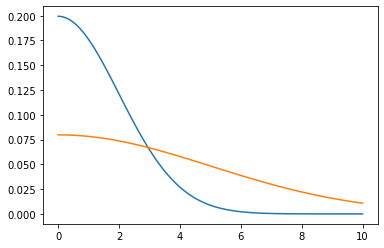

In [20]:
xs = np.linspace(0., 10., num=100)

y1 = norm.pdf(xs, scale= 2.)
y2 = norm.pdf(xs, scale= 5.)

ax = plt.gca()

ax.plot(xs, y1)
ax.plot(xs, y2)